In [1]:
def f(x):
    return x*3 - 7*x*2 + 14*x - 6

def bisection_method(a, b, tolerance=1e-3):
    if f(a) * f(b) > 0:
        print("No hay raíz en este intervalo.")
        return None, 0
    else:
        iterations = 0
        while (b - a) / 2 > tolerance:
            midpoint = (a + b) / 2
            iterations += 1
            if f(midpoint) == 0:  # Hemos encontrado la raíz exacta
                return midpoint, iterations
            elif f(a) * f(midpoint) < 0:  # La raíz está en [a, midpoint]
                b = midpoint
            else:  # La raíz está en [midpoint, b]
                a = midpoint
        return (a + b) / 2, iterations

# Intervalos dados
intervals = [(0, 1), (1, 3.2), (3.2, 4)]

# Soluciones para cada intervalo
for i, (a, b) in enumerate(intervals, start=1):
    root, iterations = bisection_method(a, b)
    if root is not None:
        print(f"Intervalo {i} [{a}, {b}]: raíz aproximada = {root:.3f}, iteraciones = {iterations}")
    else:
        print(f"Intervalo {i} [{a}, {b}]: No hay raíz en este intervalo.")

No hay raíz en este intervalo.
Intervalo 1 [0, 1]: No hay raíz en este intervalo.
Intervalo 2 [1, 3.2]: raíz aproximada = 2.000, iteraciones = 11
No hay raíz en este intervalo.
Intervalo 3 [3.2, 4]: No hay raíz en este intervalo.


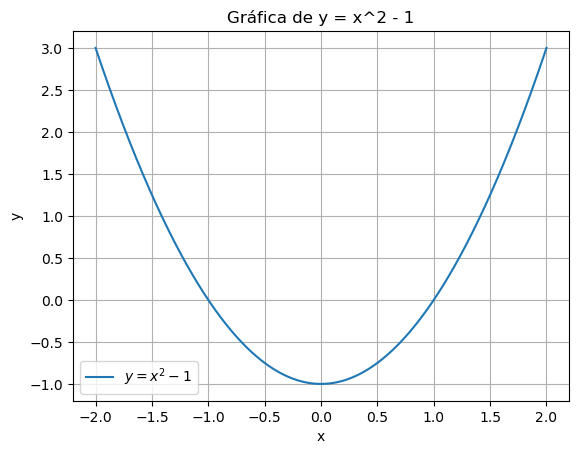

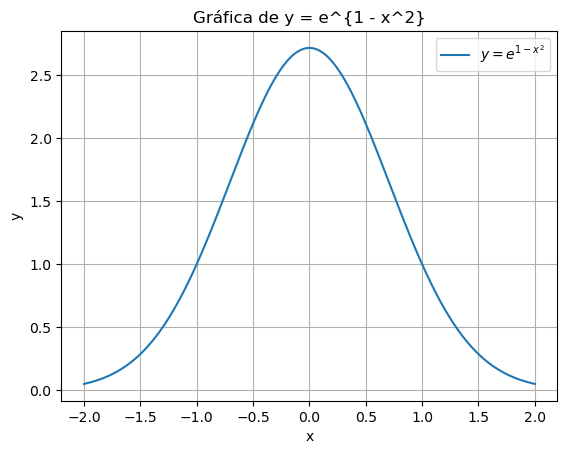

No hay raíz en este intervalo.
No hay raíz en el intervalo [-2, 0].


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Valores de x para graficar
x_vals = np.linspace(-2, 2, 400)

# Parte (a): Dibujar cada gráfica de forma independiente

# Gráfica de y = x^2 - 1
y1 = x_vals**2 - 1
plt.figure()  # Crear una nueva figura
plt.plot(x_vals, y1, label=r"$y = x^2 - 1$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Gráfica de y = x^2 - 1")
plt.show()

# Gráfica de y = e^{1 - x^2}
y2 = np.exp(1 - x_vals**2)
plt.figure()  # Crear una nueva figura
plt.plot(x_vals, y2, label=r"$y = e^{1 - x^2}$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Gráfica de y = e^{1 - x^2}")
plt.show()

# Parte (b): Método de bisección
def f(x):
    return x*2 - 1 - math.exp(1 - x*2)

def bisection_method(a, b, tolerance=1e-3):
    if f(a) * f(b) > 0:
        print("No hay raíz en este intervalo.")
        return None
    else:
        while (b - a) / 2 > tolerance:
            midpoint = (a + b) / 2
            if f(midpoint) == 0:  # Hemos encontrado la raíz exacta
                return midpoint
            elif f(a) * f(midpoint) < 0:  # La raíz está en [a, midpoint]
                b = midpoint
            else:  # La raíz está en [midpoint, b]
                a = midpoint
        return (a + b) / 2

# Intervalo dado
a, b = -2, 0
root = bisection_method(a, b)

if root is not None:
    print(f"Raíz aproximada en el intervalo [{a}, {b}] es x ≈ {root:.3f}")
else:
    print(f"No hay raíz en el intervalo [{a}, {b}].")

In [4]:
import math

# Parámetros dados
L = 10  # Longitud del abrevadero en cm
r = 1   # Radio del semicírculo en cm
V_target = 12.4  # Volumen deseado en cm³

# Ecuación para el volumen con los valores de L y r sustituidos
equation = lambda h: 10 * (0.5 * math.pi * r**2 - r**2 * math.asin(h / r) - h * math.sqrt(r**2 - h**2)) - V_target

# Método de bisección para encontrar h
def bisection(a, b, tol=0.01, max_iterations=20):
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iterations:
        midpoint = (a + b) / 2
        if equation(midpoint) == 0 or (b - a) / 2 < tol:
            return midpoint, iterations
        elif equation(a) * equation(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iterations += 1
    return (a + b) / 2, iterations

# Intervalo inicial para h (0 a r)
a, b = 0, r
h_solution, iter_count = bisection(a, b)

print(f"La profundidad del agua (h) es aproximadamente: {h_solution:.6f} cm, calculado en {iter_count} iteraciones")


La profundidad del agua (h) es aproximadamente: 0.164062 cm, calculado en 6 iteraciones


In [6]:
import math

# Parámetros dados
s0 = 300         # Altura inicial en metros
g = 9.81         # Gravedad en m/s^2
m = 0.25         # Masa en kg
k = 0.1          # Coeficiente de resistencia en Ns/m
tolerance = 0.01 # Tolerancia para el método de bisección

# Función para la altura s(t)
def height_function(t):
    term1 = s0
    term2 = (m * g / k) * t
    term3 = (m**2 * g / k**2) * (1 - math.exp(-k * t / m))
    return term1 - term2 + term3

# Método de bisección para encontrar el tiempo cuando s(t) = 0
def bisection(a, b, tol=tolerance, max_iterations=20):
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iterations:
        midpoint = (a + b) / 2
        if height_function(midpoint) == 0 or (b - a) / 2 < tol:
            return midpoint, iterations
        elif height_function(a) * height_function(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iterations += 1
    return (a + b) / 2, iterations

# Intervalo inicial para t (ajustado según el problema)
a, b = 7, 8  # Basado en el análisis previo
t_solution, iter_count = bisection(a, b)

print(f"El tiempo en tocar el suelo (t) es aproximadamente: {t_solution:.6f} segundos, calculado en {iter_count} iteraciones")

El tiempo en tocar el suelo (t) es aproximadamente: 7.992188 segundos, calculado en 6 iteraciones


In [7]:
import math

# Función f(x) = x^3 - x - 1
def f(x):
    return x**3 - x - 1

# Parámetros del intervalo y la precisión
a = 1
b = 2
epsilon = 1e-4

# Calcular el número mínimo de iteraciones necesarias usando la fórmula del teorema de bisección
N_min = math.ceil((math.log(b - a) - math.log(epsilon)) / math.log(2))

# Método de bisección
def bisection(f, a, b, tol=epsilon, max_iterations=N_min):
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iterations:
        midpoint = (a + b) / 2
        if f(midpoint) == 0 or (b - a) / 2 < tol:
            return midpoint, iterations
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iterations += 1
    return (a + b) / 2, iterations

# Encontrar la raíz en el intervalo [1, 2] con la precisión dada
root, iter_count = bisection(f, a, b)

root, iter_count, N_min

(1.32476806640625, 13, 14)